**Load The Data**

In [52]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Exploratory Data Analysis**

In [53]:
df.shape

(1338, 7)

In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Identifying Missing Values**

In [56]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Encoding Categorical vlaues to Numerical values(One-hot Encoding)**

In [60]:
df = pd.get_dummies(df, columns=['sex', 'smoker'], drop_first=False)
df=df.astype(int)

In [61]:
df.dtypes

,0
age,int64
bmi,int64
children,int64
charges,int64
sex_female,int64
sex_male,int64
smoker_no,int64
smoker_yes,int64


In [58]:
df.drop("region",axis=1,inplace=True)

In [59]:
df.shape

(1338, 6)

**Check Correlation(To understand the data)***

In [72]:
df.corr()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
age,1.000000,0.108437,0.042469,0.299009,0.020856,-0.020856,0.025019,-0.025019
bmi,0.108437,1.000000,0.011097,0.196188,-0.046503,0.046503,-0.001669,0.001669
children,0.042469,0.011097,1.000000,0.067999,-0.017163,0.017163,-0.007673,0.007673
charges,0.299009,0.196188,0.067999,1.000000,-0.057293,0.057293,-0.787251,0.787251
sex_female,0.020856,-0.046503,-0.017163,-0.057293,1.000000,-1.000000,0.076185,-0.076185
sex_male,-0.020856,0.046503,0.017163,0.057293,-1.000000,1.000000,-0.076185,0.076185
smoker_no,0.025019,-0.001669,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000
smoker_yes,-0.025019,0.001669,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000


**Splitting Training and Testing Data**
**,Model Fitting**

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_processed = df.drop("charges", axis=1)
y_processed = df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x_processed, y_processed, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Making Prediction**

In [67]:
y_pred=model.predict(x_test)

In [74]:
print(y_pred)

[ 8668.24611154  7122.79417929 36679.47856365  9348.80028498
 26727.65543778 10940.55243242   144.43855888 16598.37198924
   830.60536671 11097.61832476 28565.68939357  9261.80906945
  5426.27016313 38544.18855501 40204.65479324 37068.81129956
 15234.55600146 35993.99204882  9473.01251185 31278.18325245
  4155.32048227 10427.68776264  2744.0240952   6453.54391017
 11361.11579079 12403.94549053 14924.3771462   6096.88101826
  9508.38999676  2486.81955657  9544.44777468 12849.82429845
  4567.66533172  3285.41174653  4974.09842781 12362.95537123
  2391.42943021  9027.13370393 33371.19704638 32832.71438854
  4247.06021772  4271.01508126 14325.2015539  11403.53160052
  8832.84680025 12484.64377866  5101.21564817  3628.06309321
 35492.43128337  9295.64214689 16021.72557005  2590.72731081
 12164.33778363  1183.88032471 13563.53125632 12228.11953304
  3944.59998029 32080.24201186 13758.49845301 12472.47575987
 14393.05153023 10673.40457548 16789.95125203  7570.89768769
 11238.06679734  3866.12

**Model Evaluation**

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

print("mae:",mae)
print("mse:",mse)
print("r2_score:",r2_score)

mae: 4209.501628392771
mse: 33957993.03855343
r2_score: 0.7812667367072943


**Residual Analysis**

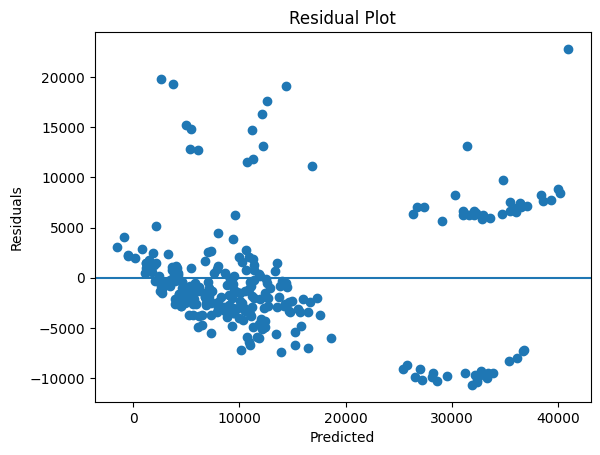

In [73]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**Visualization**

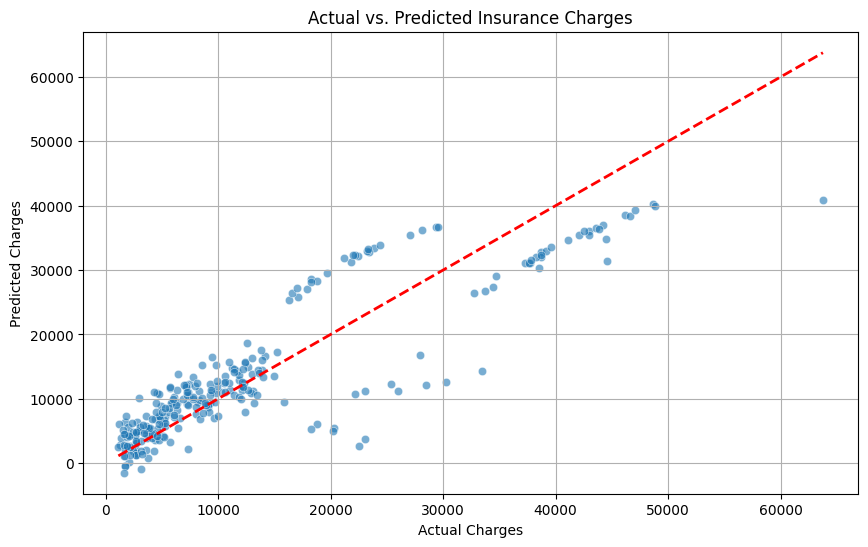

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Insurance Charges")
plt.grid(True)
plt.show()